In [ ]:
import pickle5 as pickle
import gzip
import pandas as pd
import numpy as np
from pymatgen.util import coord

In [ ]:
with gzip.open('data.pickle.gz', 'rb') as fh:
    data = pickle.load(fh, )

In [ ]:
res = []
for j in range(data.shape[0]):
    t = data.iloc[j]
    x0 = np.sum(np.array([str(i) for i in t.defect_representation.species]) == 'X0+')
    all = len(t.defect_representation.species)
    mo = np.sum(np.array([str(i) for i in t.initial_structure.species]) == 'Mo')
    s = np.sum(np.array([str(i) for i in t.initial_structure.species]) == 'S')
    if(all == 2 and x0 == 2 and mo == 63 and s == 127):
      res.append(j)

In [ ]:
t

descriptor_id                                         6141cf123ac25c70a5c6c835
energy                                                              -1367.1699
energy_per_atom                                                      -7.233703
fermi_level                                                          -0.398333
homo                                                                    -0.614
lumo                                                                   -0.1845
initial_structure            [[1.27612629e-07 1.84192955e+00 3.71975100e+00...
defect_representation        [[ 1.60791911 21.17482301  3.719751  ] X0+, [ ...
formation_energy                                                        11.756
formation_energy_per_site                                             3.918667
band_gap                                                                0.4295
Name: 615083823ac25c70a5c6ce03, dtype: object

In [ ]:
s_x_c = []
s_y_c = []
s_z_c = []
mo_x_c = []
mo_y_c = []
mo_z_c = []
for i in range(63, 189):
    s_x_c.append(t.initial_structure[i].coords[0])
    s_y_c.append(t.initial_structure[i].coords[1])
    s_z_c.append(t.initial_structure[i].coords[2])
for i in range(0, 63):
    mo_x_c.append(t.initial_structure[i].coords[0])
    mo_y_c.append(t.initial_structure[i].coords[1])
    mo_z_c.append(t.initial_structure[i].coords[2])

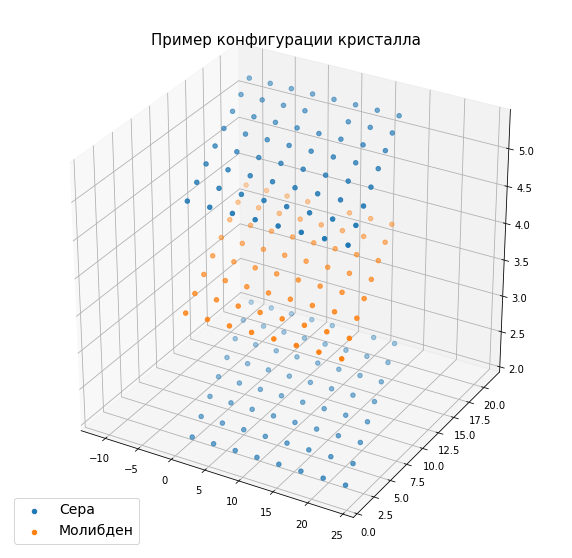

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(s_x_c, s_y_c, s_z_c, label = "Сера")
ax.scatter(mo_x_c, mo_y_c, mo_z_c, label = "Молибден")
plt.legend(fontsize=14, loc='lower left')
plt.title("Пример конфигурации кристалла", fontsize = 15)
plt.show()


In [ ]:
d = {'ro1':[], 'energy':[]}
for j in res:
  en = data.iloc[j].formation_energy
  ro1 = ((data.iloc[j].defect_representation[0].coords[0] - data.iloc[j].defect_representation[1].coords[0])**2 + (data.iloc[j].defect_representation[0].coords[1] - data.iloc[j].defect_representation[1].coords[1])**2 + (data.iloc[j].defect_representation[0].coords[2] - data.iloc[j].defect_representation[1].coords[2])**2)**0.5
  d['ro1'].append(ro1)
  d['energy'].append(en)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

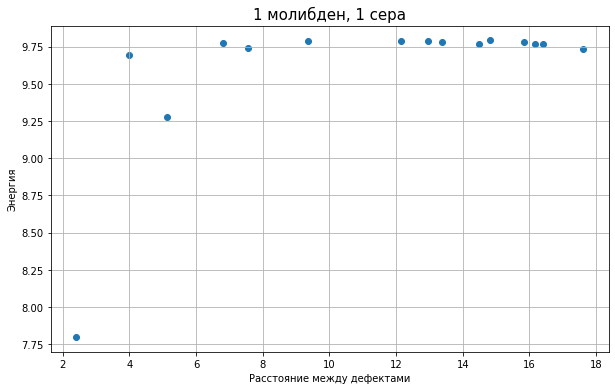

In [ ]:
x = d['ro1']
y = d['energy']
plt.figure(figsize = (10,6))
plt.scatter(x,y)
plt.xlabel("Расстояние между дефектами")
plt.ylabel("Энергия")
plt.title("1 молибден, 1 сера", fontsize = 15)
plt.grid()
plt.show()

In [ ]:
res2 = []
for j in range(data.shape[0]):
    t = data.iloc[j]
    x0 = np.sum(np.array([str(i) for i in t.defect_representation.species]) == 'X0+')
    all = len(t.defect_representation.species)
    mo = np.sum(np.array([str(i) for i in t.initial_structure.species]) == 'Mo')
    s = np.sum(np.array([str(i) for i in t.initial_structure.species]) == 'S')
    if(all == 3 and x0 == 3 and mo == 63 and s == 126):
      res2.append(j)

In [ ]:
d = {'ro1':[], 'ro2':[], 'ro3':[], 'energy':[]}
for j in res2:
  en = data.iloc[j].formation_energy
  ro1 = ((data.iloc[j].defect_representation[0].coords[0] - data.iloc[j].defect_representation[1].coords[0])**2 + (data.iloc[j].defect_representation[0].coords[1] - data.iloc[j].defect_representation[1].coords[1])**2 + (data.iloc[j].defect_representation[0].coords[2] - data.iloc[j].defect_representation[1].coords[2])**2)**0.5
  ro2 = ((data.iloc[j].defect_representation[0].coords[0] - data.iloc[j].defect_representation[2].coords[0])**2 + (data.iloc[j].defect_representation[0].coords[1] - data.iloc[j].defect_representation[2].coords[1])**2 + (data.iloc[j].defect_representation[0].coords[2] - data.iloc[j].defect_representation[2].coords[2])**2)**0.5
  ro3 = ((data.iloc[j].defect_representation[1].coords[0] - data.iloc[j].defect_representation[2].coords[0])**2 + (data.iloc[j].defect_representation[1].coords[1] - data.iloc[j].defect_representation[2].coords[1])**2 + (data.iloc[j].defect_representation[1].coords[2] - data.iloc[j].defect_representation[2].coords[2])**2)**0.5
  d['ro1'].append(ro1)
  d['ro2'].append(ro2)
  d['ro3'].append(ro3)
  d['energy'].append(en)

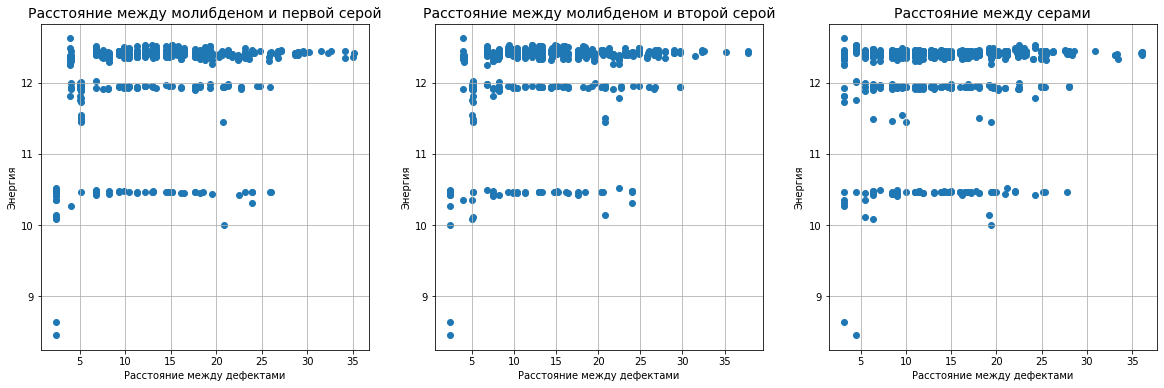

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,6))
x1 = d['ro1']
x2 = d['ro2']
x3 = d['ro3']
y = d['energy']
ax1.grid()
ax2.grid()
ax3.grid()
ax1.set_xlabel("Расстояние между дефектами")
ax1.set_ylabel("Энергия")
ax2.set_xlabel("Расстояние между дефектами")
ax2.set_ylabel("Энергия")
ax3.set_xlabel("Расстояние между дефектами")
ax3.set_ylabel("Энергия")
ax1.set_title("Расстояние между молибденом и первой серой", fontsize = 14)
ax2.set_title("Расстояние между молибденом и второй серой", fontsize = 14)
ax3.set_title("Расстояние между серами", fontsize = 14)
ax1.scatter(x1,y)
ax2.scatter(x2,y)
ax3.scatter(x3,y)
plt.show()